<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/T02/Metodo_Gauss_siedel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*SOLUCIÓN A LA ECUACIÓN DE LAPLACE IMPLEMENTANDO EL MÉTODO GAUSS-SIEDEL*

*Problema  2

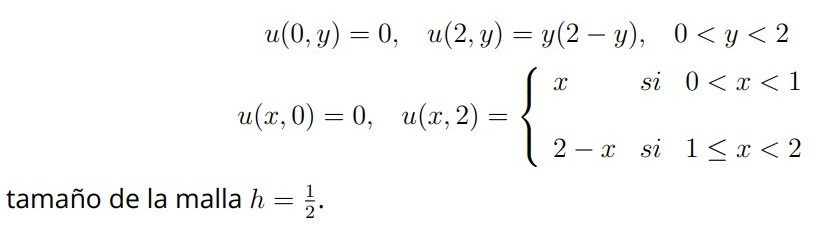


Recordemos que el problema de Dirichlet nos lleva al siguiente sitema en la forma matricial:

$Ax=b$
 Es necesario recalcar que el número de ecuaciones será igual al número de puntos interiores, para este segundo ejercicio, al trazar el mallado se identificaron  9 puntos interiores.

 Lo anterior implica que se obtuvo un sistema de 9 ecuaciones con 9 incognitas.

En forma matricial:
$Ax=b$; donde $$A=\begin{pmatrix}
4 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 \\
-1 & 4 & -1 & 0 & -1 & 0 & 0 & 0 & 0\\
0 & -1 & 4 & 0 & 0 & -1 & 0 & 0 & 0\\
-1 & 0 & 0 & 4 & -1 & 0 & -1 & 0 & 0\\
0 & -1 & 0 & -1 & 4 & -1 & 0 & -1 & 0\\
0 & 0 & -1 & 0 & -1 & 4 & 0 & 0 & -1\\
0 & 0 & 0 & -1 & 0 & 0 & 4 & -1 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & -1 & 4 & -1\\
0 & 0 & 0 & 0 & 0 & -1 & 0 & -1 & 4
\end{pmatrix}$$\\

$$b=\begin{pmatrix}
0 \\ 0 \\ 1/2 \\ 0 \\
0 \\ 1 \\ 3/4 \\
1 \\ 5/4
\end{pmatrix}$$


Definimos una función que implementará el método. Para ello los parámetros de dicha función serán:



*   A: matriz de coeficientes
*   b: vector de términos independientes
*  VI: vector inicial
*   t: tolerancia para criterio de paro
*   M: Número de iteraciones máximas que se pemite


In [2]:
""" Método de Gauss Siedel """

import numpy as np    # Librería para manejar vectores y matrices
import pandas as pd   # Librería para mostrar resultados en tabla

def gausseidl(A, b, VI, T, M):# Definimos la funcios y el significado de sus respectivos parámetros

    """
    A: matriz de coeficientes
    b: vector de términos independientes
    VI: aproximación inicial
    t: tolerancia para criterio de paro
    M: máximo de iteraciones
    """
    n = len(b)
    x = VI.copy()  # Copiamos el vector inicial
    resultados = []  # lista para almacenar las iteraciones

    k = 1
    while k <= M:
        x_old = x.copy()  # Guardamos la aproximación anterior

        ### cálculo de los xi
        for i in range(n):
            suma1 = sum(A[i][j] * x[j] for j in range(i))       # usa valores nuevos
            suma2 = sum(A[i][j] * x_old[j] for j in range(i+1, n)) # usa valores antiguos
            x[i] = (b[i] - suma1 - suma2) / A[i][i]

        # Cálculo del error
        error = np.linalg.norm(x - x_old, ord=np.inf)

        # Guardamos en la tabla
        resultados.append([k] + list(x) + [error])

        ##### criterio de tolerancia
        if error < t:
            tabla = pd.DataFrame(resultados, columns=["Iteración"] + [f"x{i+1}" for i in range(n)] + ["Error"])
            print(f"\n Convergió en {k} iteraciones.")
            return x, tabla

        ####### incrementar iteración
        k += 1

    ######## máximo de iteraciones alcanzado
    tabla = pd.DataFrame(resultados, columns=["Iteración"] + [f"x{i+1}" for i in range(n)] + ["Error"])
    print("\n Número máximo de iteraciones excedido.")
    return None, tabla

# Ejercicio 2, considerando los coeficientes de la matriz A y elemtos de vector b
if __name__ == "__main__":
    # Matriz de coeficientes
    A = np.array([[4, -1, 0, -1, 0, 0, 0, 0, 0],
                  [-1, 4, -1, 0, -1, 0, 0 , 0, 0],
                  [0, -1, 4, 0, 0, -1, 0 , 0, 0],
                  [-1, 0, 0, 4, -1, 0, -1 , 0, 0],
                  [0, -1, 0, -1, 4, -1, 0 , -1, 0],
                  [0, 0, -1, 0, -1, 4, 0 , 0, -1],
                  [0, 0, 0, -1, 0, 0, 4 , -1, 0],
                  [0, 0, 0, 0, -1, 0, -1, 4, -1],
                  [0, 0, 0, 0 ,0, -1, 0, -1, 4 ]], dtype=float)

    # Vector independiente
    b = np.array([0, 0, 1/2 , 0 ,0, 1, 3/4, 1 ,5/4], dtype=float)

    # Aproximación inicial
    VI = np.zeros_like(b)

    # Parámetros del método
    t = 1e-6
    M = 100

    sol, tabla = gausseidl(A, b, VI, t, M)

    if sol is not None:
        print("\n Solución aproximada final:", sol)

    print("\n Tabla de iteraciones:")
    print(tabla)


 Convergió en 20 iteraciones.

 Solución aproximada final: [0.10937408 0.2098205  0.32366025 0.22767765 0.40624908 0.58482097
 0.39508882 0.60267811 0.60937477]

 Tabla de iteraciones:
    Iteración        x1        x2        x3        x4        x5        x6  \
0           1  0.000000  0.000000  0.125000  0.000000  0.000000  0.281250   
1           2  0.000000  0.031250  0.203125  0.046875  0.164062  0.456055   
2           3  0.019531  0.096680  0.263184  0.114258  0.285156  0.523315   
3           4  0.052734  0.150269  0.293396  0.168091  0.345703  0.554428   
4           5  0.079590  0.179672  0.308525  0.197525  0.375977  0.569670   
5           6  0.094299  0.194700  0.316092  0.212557  0.391113  0.577251   
6           7  0.101814  0.202255  0.319877  0.220112  0.398682  0.581037   
7           8  0.105592  0.206037  0.321769  0.223895  0.402466  0.582929   
8           9  0.107483  0.207929  0.322715  0.225787  0.404358  0.583875   
9          10  0.108429  0.208875  0.323188 